# Synthetic Minority Oversampling Technique [ SMOTE]

* SMOTE is a technique used in machine learning to address imbalanced datasets where te minority class has significantly fewer instances than te majority class.SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification 

In [5]:
x,y = make_classification(n_samples=1000,n_features=2, n_clusters_per_class=1,weights=[0.90],random_state=1,n_redundant=0 )

# Here X is independent and Y is dependent . 

In [6]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [7]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
df = pd.concat([df1,df2],axis=1)

In [13]:
df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [14]:
df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

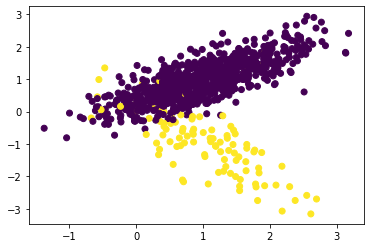

In [15]:
import matplotlib.pyplot as plt 
plt.scatter(df['f1'],df['f2'],c = df['target'])

In [16]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
#Transform the dataset 

oversample = SMOTE()
x,y = oversample.fit_resample(df[['f1','f2']],df['target'])

In [20]:
x.shape

(1788, 2)

In [21]:
y.shape

(1788,)

In [29]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

In [30]:
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,1.846397,-2.260847,1
1784,1.111688,-0.825416,1
1785,0.388753,0.077203,1
1786,0.351757,-0.852457,1


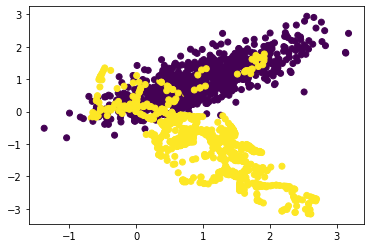

In [32]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['target'])